In [9]:
!pip install pandas
!pip install numpy
!pip install pandas-profiling==2.7.1
!pip install pycaret
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import os

!pip install seaborn
import seaborn as sns

from pandas.api.types import CategoricalDtype
#Test_value_label = pd.read_csv('Test_valueing set labels.csv')
#Test_value_value = pd.read_csv('Test_valueing set values.csv')
Test_value = pd.read_csv('Test_value_clean.csv')
#Test_value = pd.merge(Test_value_value,Test_value_label, how='inner',left_on='id',right_on='id', left_index=False)

  Using cached pandas_profiling-2.7.1-py2.py3-none-any.whl (252 kB)
  Using cached visions-0.4.1-py3-none-any.whl (58 kB)


  Attempting uninstall: visions
    Found existing installation: visions 0.7.1
    Uninstalling visions-0.7.1:
      Successfully uninstalled visions-0.7.1
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 3.0.0
    Uninstalling pandas-profiling-3.0.0:
      Successfully uninstalled pandas-profiling-3.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.2 requires pandas-profiling>=2.8.0, but you have pandas-profiling 2.7.1 which is incompatible.


  Using cached pandas_profiling-3.0.0-py2.py3-none-any.whl (248 kB)
  Using cached visions-0.7.1-py3-none-any.whl (102 kB)


  Attempting uninstall: visions
    Found existing installation: visions 0.4.1
    Uninstalling visions-0.4.1:
      Successfully uninstalled visions-0.4.1
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 2.7.1
    Uninstalling pandas-profiling-2.7.1:
      Successfully uninstalled pandas-profiling-2.7.1


In [3]:
from pycaret.utils import version
version()

'2.3.2'

In [10]:
Test_value.isnull().sum()

Unnamed: 0               0
id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
s

In [11]:
Test_value['construction_year']

0        2012
1        2000
2        2010
3        1987
4        2000
         ... 
14845    1988
14846    1994
14847    2010
14848    2009
14849    2008
Name: construction_year, Length: 14850, dtype: int64

In [12]:
year_Cluster = Test_value[['longitude','latitude','region_code','installer']]
year_Cluster
#,'construction_year'
# ,'funder','installer'

,longitude,latitude,region_code,installer
0,35.290799,-4.059696,21,DMDD
1,36.656709,-3.309214,2,DWE
2,34.767863,-5.004344,13,DWE
3,38.058046,-9.418672,8,FINN WATER
4,35.006123,-10.950412,10,BRUDER
...,...,...,...,...
14845,38.852669,-6.582841,6,Da
14846,37.451633,-5.350428,4,HIAP
14847,34.739804,-4.585587,13,DWE
14848,35.432732,-10.584159,10,DWE


In [13]:
from pycaret.clustering import *
clu1 = setup(year_Cluster, session_id=123, log_experiment=True, log_plots = True, 
             experiment_name='construction')

,Description,Value
0,session_id,123
1,Original Data,"(14850, 4)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,2
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(14850, 1081)"
9,CPU Jobs,-1


In [14]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [15]:
kmeans = create_model('kmeans', num_clusters = 10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3206,9111.5661,1.1552,0,0,0


In [16]:
kmodes = create_model('kmodes', num_clusters = 10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1883,636.2859,2.796,0,0,0


<Figure size 576x396 with 0 Axes>

In [46]:
kmeans_results = assign_model(kmeans)
kmeans_results

,longitude,latitude,region_code,installer,Cluster
0,35.290799,-4.059696,21,DMDD,Cluster 3
1,36.656709,-3.309214,2,DWE,Cluster 0
2,34.767863,-5.004344,13,DWE,Cluster 3
3,38.058046,-9.418672,8,FINN WATER,Cluster 7
4,35.006123,-10.950412,10,BRUDER,Cluster 4
...,...,...,...,...,...
14845,38.852669,-6.582841,6,Da,Cluster 6
14846,37.451633,-5.350428,4,HIAP,Cluster 6
14847,34.739804,-4.585587,13,DWE,Cluster 3
14848,35.432732,-10.584159,10,DWE,Cluster 4


In [47]:
plot_model(kmeans)

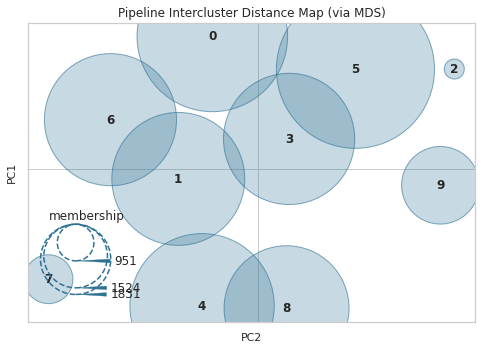

In [48]:
plot_model(kmeans, plot = 'distance')


In [49]:
kmeans_results['construction_year'] = Test_value['construction_year']
kmeans_results

,longitude,latitude,region_code,installer,Cluster,construction_year
0,35.290799,-4.059696,21,DMDD,Cluster 3,2012
1,36.656709,-3.309214,2,DWE,Cluster 0,2000
2,34.767863,-5.004344,13,DWE,Cluster 3,2010
3,38.058046,-9.418672,8,FINN WATER,Cluster 7,1987
4,35.006123,-10.950412,10,BRUDER,Cluster 4,2000
...,...,...,...,...,...,...
14845,38.852669,-6.582841,6,Da,Cluster 6,1988
14846,37.451633,-5.350428,4,HIAP,Cluster 6,1994
14847,34.739804,-4.585587,13,DWE,Cluster 3,2010
14848,35.432732,-10.584159,10,DWE,Cluster 4,2009


In [50]:
kmeans_results.loc[kmeans_results['construction_year'] == 0]

,longitude,latitude,region_code,installer,Cluster,construction_year
12,33.661074,-4.165720,14,Building works company Ltd,Cluster 3,0
13,33.007680,-3.209529,19,DWE,Cluster 5,0
16,39.850190,-7.727946,6,DWE,Cluster 6,0
18,31.586798,-3.387808,17,DWE,Cluster 2,0
24,33.722359,-3.047122,17,DWE,Cluster 5,0
...,...,...,...,...,...,...
14831,34.061605,-5.684724,19,DWE,Cluster 3,0
14834,35.840727,-4.633272,1,DWE,Cluster 3,0
14835,32.442886,-3.644662,17,DWE,Cluster 5,0
14841,34.061605,-5.684724,17,DWE,Cluster 3,0


In [51]:
test_year = kmeans_results.loc[kmeans_results['construction_year'] != 0]
test_year

,longitude,latitude,region_code,installer,Cluster,construction_year
0,35.290799,-4.059696,21,DMDD,Cluster 3,2012
1,36.656709,-3.309214,2,DWE,Cluster 0,2000
2,34.767863,-5.004344,13,DWE,Cluster 3,2010
3,38.058046,-9.418672,8,FINN WATER,Cluster 7,1987
4,35.006123,-10.950412,10,BRUDER,Cluster 4,2000
...,...,...,...,...,...,...
14845,38.852669,-6.582841,6,Da,Cluster 6,1988
14846,37.451633,-5.350428,4,HIAP,Cluster 6,1994
14847,34.739804,-4.585587,13,DWE,Cluster 3,2010
14848,35.432732,-10.584159,10,DWE,Cluster 4,2009


In [52]:
pd.pivot_table(test_year,index=["region_code","Cluster"],values=["construction_year"],aggfunc=[np.mean]).astype(int)

mean
                      construction_year
region_code Cluster                    
2           Cluster 0              1999
            Cluster 5              2003
3           Cluster 0              1996
4           Cluster 0              1982
            Cluster 1              1995
            Cluster 6              1993
5           Cluster 1              1996
            Cluster 4              1994
            Cluster 6              1998
6           Cluster 6              2003
            Cluster 7              2006
7           Cluster 6              2001
8           Cluster 7              1995
9           Cluster 4              1995
            Cluster 7              1992
10          Cluster 1              1999
            Cluster 3              2009
            Cluster 4              1996
            Cluster 7              1998
11          Cluster 1              1991
            Cluster 4              1998
13          Cluster 3              1993
15          Cluster 8              1991
            Cluster 9              1989
16          Cluster 2              1997
            Cluster 9              1998
17          Cluster 5              2002
19          Cluster 5              1995
20          Cluster 5              1997
21          Cluster 0              2002
            Cluster 1              2003
            Cluster 3              2003

In [53]:
base_year = pd.DataFrame(pd.pivot_table(test_year,index=["Cluster"],values=["construction_year"],aggfunc=[np.mean]).astype(int).to_records())
base_year

,Cluster,"('mean', 'construction_year')"
0,Cluster 0,1997
1,Cluster 1,1996
2,Cluster 2,1997
3,Cluster 3,1996
4,Cluster 4,1997
5,Cluster 5,1997
6,Cluster 6,1999
7,Cluster 7,1994
8,Cluster 8,1991
9,Cluster 9,1996


In [55]:
base_year = base_year.rename(columns={"('mean', 'construction_year')":'year'})
base_year

,Cluster,year
0,Cluster 0,1997
1,Cluster 1,1996
2,Cluster 2,1997
3,Cluster 3,1996
4,Cluster 4,1997
5,Cluster 5,1997
6,Cluster 6,1999
7,Cluster 7,1994
8,Cluster 8,1991
9,Cluster 9,1996


In [56]:
dict = base_year.set_index('Cluster')['year'].to_dict()
dict['Cluster 0']
dict

{'Cluster 0': 1997,
 'Cluster 1': 1996,
 'Cluster 2': 1997,
 'Cluster 3': 1996,
 'Cluster 4': 1997,
 'Cluster 5': 1997,
 'Cluster 6': 1999,
 'Cluster 7': 1994,
 'Cluster 8': 1991,
 'Cluster 9': 1996}

In [57]:
pd.pivot_table(test_year,index=["region_code"],values=["construction_year"],aggfunc=[np.mean]).astype(int)

,mean
,construction_year
region_code,
2,1999
3,1996
4,1993
5,1996
6,2003
7,2001
8,1995
9,1992


In [58]:
kmeans_results

,longitude,latitude,region_code,installer,Cluster,construction_year
0,35.290799,-4.059696,21,DMDD,Cluster 3,2012
1,36.656709,-3.309214,2,DWE,Cluster 0,2000
2,34.767863,-5.004344,13,DWE,Cluster 3,2010
3,38.058046,-9.418672,8,FINN WATER,Cluster 7,1987
4,35.006123,-10.950412,10,BRUDER,Cluster 4,2000
...,...,...,...,...,...,...
14845,38.852669,-6.582841,6,Da,Cluster 6,1988
14846,37.451633,-5.350428,4,HIAP,Cluster 6,1994
14847,34.739804,-4.585587,13,DWE,Cluster 3,2010
14848,35.432732,-10.584159,10,DWE,Cluster 4,2009


In [59]:
# mapp using base_year to replace zero 
#kmeans_results.loc[kmeans_results['construct_years'] == 0, 'construct_years' ] = base_year[:1]
#kmeans_results.loc[kmeans_results.Cluster.isin(base_year.Cluster),'construction_year'] = base_year['year']

#kmeans_results['construction_year'] = kmeans_results['construction_year'].apply(lambda x: x.Cluster.map(dict) if x == 0 else x) 
#df.customer.map(genders_dict)

#if kmeans_results['construction_year'].eq(0).any():
#    kmeans_results['construction_year'] = kmeans_results.Cluster.map(dict)

kmeans_results.loc[kmeans_results['construction_year'] == 0, 'construction_year'] = kmeans_results.Cluster.map(dict)
    
    

In [60]:
kmeans_results

,longitude,latitude,region_code,installer,Cluster,construction_year
0,35.290799,-4.059696,21,DMDD,Cluster 3,2012
1,36.656709,-3.309214,2,DWE,Cluster 0,2000
2,34.767863,-5.004344,13,DWE,Cluster 3,2010
3,38.058046,-9.418672,8,FINN WATER,Cluster 7,1987
4,35.006123,-10.950412,10,BRUDER,Cluster 4,2000
...,...,...,...,...,...,...
14845,38.852669,-6.582841,6,Da,Cluster 6,1988
14846,37.451633,-5.350428,4,HIAP,Cluster 6,1994
14847,34.739804,-4.585587,13,DWE,Cluster 3,2010
14848,35.432732,-10.584159,10,DWE,Cluster 4,2009



fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.histplot(year_Cluster['construction_year'], ax=ax1)
sns.histplot(Construct_year['construction_year'],ax=ax2)
plt.show()


In [61]:
kmeans_results.loc[kmeans_results['construction_year'] == 0]

,longitude,latitude,region_code,installer,Cluster,construction_year


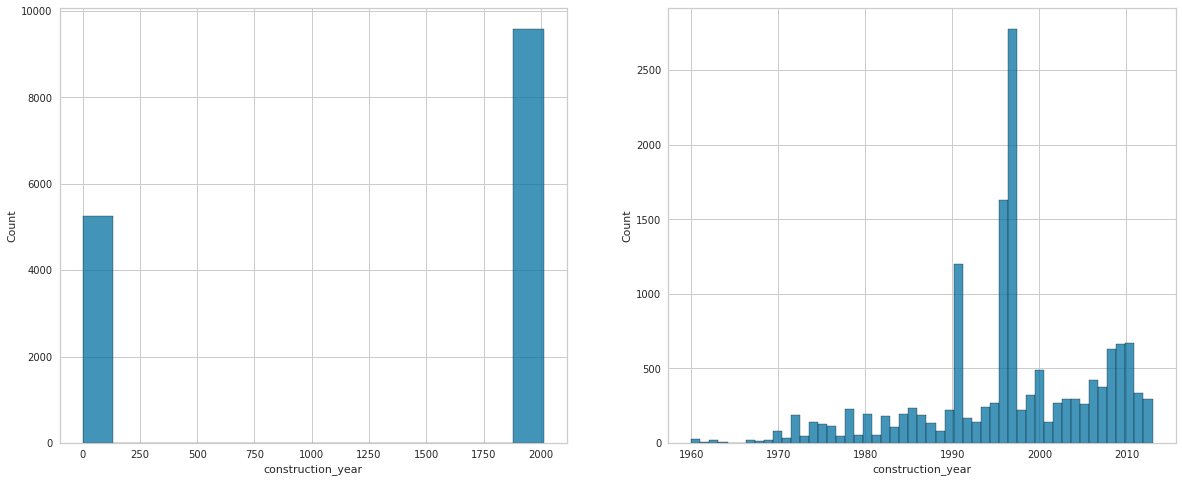

In [62]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.histplot(Test_value['construction_year'], ax=ax1)
sns.histplot(kmeans_results['construction_year'],ax=ax2)
plt.show()

In [63]:
Test_value['construction_year'] = kmeans_results['construction_year']

<AxesSubplot:>

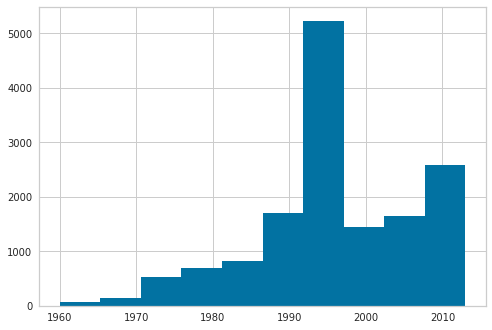

In [65]:
Test_value['construction_year'].hist()

In [67]:
Test_value.to_csv('Test_value_clean2.csv')

In [66]:
Test_value.isnull().sum()

Unnamed: 0               0
id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
s